<h1 style="text-align:center;">Método Steepest Descent para encontrar o mínimo de um paraboloide</h1>

<p style="text-align: justify; text-indent:4em"> 
    O objetivo de projeto é encontrar o ponto mínimo de um parabuloide, através do método Steepest Descent, conforme trabalho 
    <b> An Introduction to the Conjugate Gradient Method Without the Agonizing Pain</b> de 
    <i>Jonathan Richard Shewchuk </i>. Para tanto, utilizou-se o parabuloide descrito pela equação matrizial abaixo: 
</p>

\begin{align*} 
f(x) = \frac{1}{2}\ x^T Ax - B^Tx + C
\end{align*}

\begin{align*} 
A =
\left[
\begin{array}{c c c}
3 & 2\\
2 & 6\\
\end{array}
\right]
B =
\left[
\begin{array}{c c c}
2\\
-8\\
\end{array}
\right]
C =0
\end{align*}


<p style="text-align: justify; text-indent:4em"> 
    Definimos os seguinte intervalo de trabalho: de -4 a 6 em x e -6 a 4 em y. Analitacemente encontra-se que o mínimo está em (2, -2). 
</p>

<h3>Definição do grid correspondente ao intervalo de trabalho</h3>

In [8]:
import math
import numpy as np

# step de discretização
h = 1

# Demarcação da area de interesse
x1_incial = -4
x1_final = 6

x2_incial = -6
x2_final = 4

# Criacao do grid
x1 = np.arange(x1_incial, x1_final+h, h)
x2 = np.arange(x2_incial, x2_final+h, h)

X1,X2 = np.meshgrid(x1, x2)
                  



<h3>Cálculo dos valores em z conforme a equação matricial acima</h3>

In [9]:
A = np.matrix([[3, 2], [2, 6]])
B = np.matrix([[2], [-8]])

dim_1, dim_2 = X1.shape
z = np.empty((dim_1, dim_2))

for i in range(dim_1):
    for j in range(dim_2):
        x = np.matrix([X1[i][j], X2[i][j]])
        z[i][j] = ( (1/2) * x * A * x.T ) - (B.T * x.T)


<h3>Visualização do paraboloide encontrado</h3>

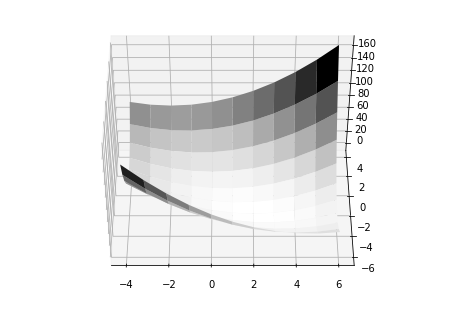

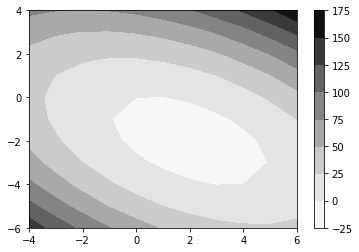

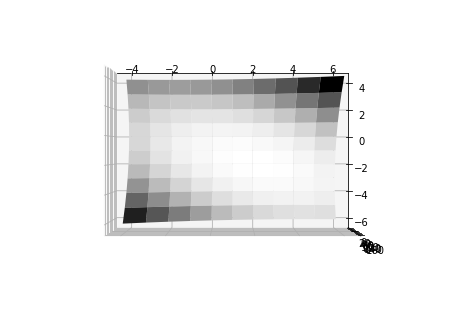

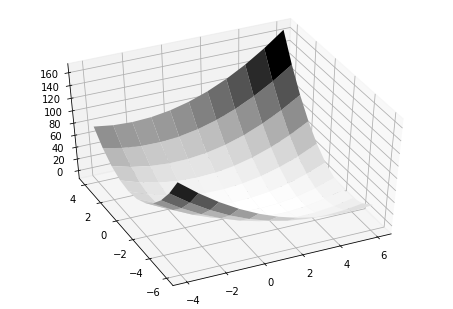

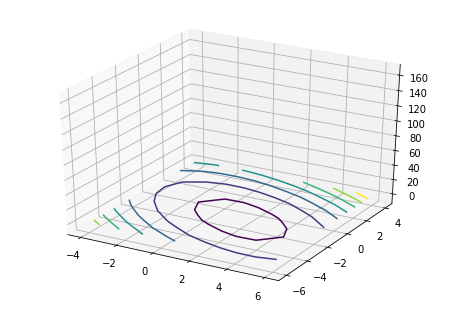

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# cm = plt.cm.YlOrRd
cm = plt.cm.Greys


fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X1, X2, z, cmap=cm, alpha=1)
ax.view_init(45, 270)
plt.show()

plt.contourf(X1, X2, z, cmap=cm)
plt.colorbar()

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X1, X2, z, cmap=cm, alpha=1)
ax.view_init(90, 270)
plt.show()

fig = plt.figure()
ax1 = Axes3D(fig)
ax1.plot_surface(X1, X2, z, cmap=cm, alpha=1)
ax1.view_init(45, 245)


# rotate the axes and update
# for angle in range(0, 135, 4):
#     ax1.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

fig = plt.figure()
ax2 = Axes3D(fig)
cset = ax2.contour(X1, X2, z, zdir='z', offset=0, animated=True)

plt.show()

<h3>Utilização do gradiente, atravé do método Steepest Descent, para a busca do mínimo</h3>

<p style="text-align: justify; text-indent:4em"> Esse método é descrito pelas equações abaixo. Inicialmente, devemos "chutar" um valor inicial x(0) e iterativamente encontrar melhores aproximações. A reta (Xi-1, Xi) é sempre ortogonal a reta (Xi, Xi+1). Além disso, devemos estabelecer um erro mínimo que utilizamos como critério de parada, bem como um número máximo de iterações. A convergência desse método é bastante lenta.</p>

\begin{align*} 
    r(i) = B - Ax(i),
\end{align*} 

\begin{align*} 
    a(i) = \frac {r^{T}_{(i)} r_{(i)} }  {r^{T}_{(i)} A r_{(i)}}\ ,
\end{align*} 

\begin{align*} 
    x(i+1) = x(i) + a(i)r(i)
\end{align*} 



In [12]:
err = 5*10**(-2)
max_int = 200
encontrado = False
count = 0

x = [np.matrix([[-4], [-4]])]

for i in range(max_int):
    ri = B - A*x[i]
    ai = ((ri.T * ri) / (ri.T*A*ri)).item(0)
    x += [x[i] + ai * ri] 
    
    if abs(x[i+1][0] - x[i][0]) < err and abs(x[i+1][1] - x[i][1]) < err:
        encontrado = True
        break

minimos = [[], []]
for minimo in x:
    minimos[0] += [minimo.item(0)]
    minimos[1] += [minimo.item(1)]

if encontrado:
    print("Minimo encontrado após ", i+1, "iterações com erro < ", err)
else:
    print("O mínimo não foi encontrado para esse valor de precisão estabelecido")
    
print("em: X(", x[-1].item(0), ") Y(", x[-1].item(1), ")")



Minimo encontrado após  5 iterações com erro <  0.05
em: X( 1.9671256197653242 ) Y( -1.9800655353896115 )


<h3>Plotagem gráfica do processo de busca do mínimo</h3>
<p style="text-align: justify; text-indent:4em"> Para melhor visualizar o processo de busca do mínimo, plotamos os pontos encontrados no processo iterativo de busca do mínimo sobre a representação do gradiente dessa parábola. O gradiente indica a direção de crescimente e, na forma quadrática, podemos expressá-lo da seguinte maneira: </p>

\begin{align*} 
\nabla g(x) =
\left[
\begin{array}{c c c}
\frac { \partial } { \partial x_1}g(x)\\
\frac { \partial } { \partial x_2}g(x) &\\
\vdots&\\ 
\frac { \partial } { \partial x_n}g(x) &\\
\end{array}
\right]
\end{align*}


<p style="text-align: justify; text-indent:4em"> Nesse caso, temos que o gradiente da nossa parabola descrita matricialmente pode ser expresso como: </p>

\begin{align*} 
\nabla f(x) = \frac{1}{2}\ A^T x + \frac{1}{2}\ Ax - B  
\end{align*}

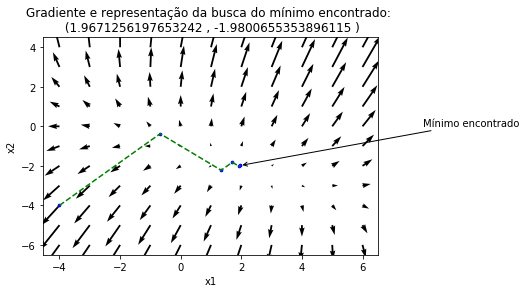

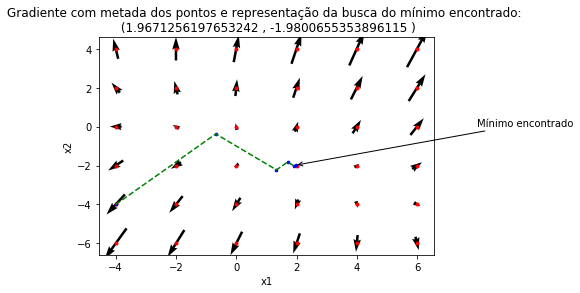

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

# X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U, V = np.empty((dim_1, dim_2)), np.empty((dim_1, dim_2))

for i in range(dim_1):
    for j in range(dim_2):
        x = np.matrix([X1[i][j], X2[i][j]])
        gradiente = (1/2)* A.T * x.T + (1/2)*A * x.T - B
        U[i][j] = gradiente.item(0)
        V[i][j] = gradiente.item(1)
    

#  Plotagem dos gráficos

plt.figure()
plt.title("Gradiente e representação da busca do mínimo encontrado: \n (" +
          str(minimos[0][-1]) + " , " + str(minimos[1][-1]) + " )")
plt.xlabel('x1')
plt.ylabel('x2')
Q = plt.quiver(X1, X2, U, V, units='width')

plt.plot(minimos[0], minimos[1], 'g--')
plt.scatter(minimos[0], minimos[1], color='b', s=7)
plt.annotate("Mínimo encontrado", 
            xy=(minimos[0][-1], minimos[1][-1]),
            xycoords='data',
            xytext=(x1_final+2 , (x2_final+x1_incial)/2),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.savefig('gradiente.png')

# --------------------------------------- x-x ------------------------------------------------------

plt.figure()
plt.title("Gradiente com metada dos pontos e representação da busca do mínimo encontrado: \n (" +
          str(minimos[0][-1]) + " , " + str(minimos[1][-1]) + " )")
plt.xlabel('x1')
plt.ylabel('x2')
Q = plt.quiver(X1[::2, ::2], X2[::2, ::2], U[::2, ::2], V[::2, ::2],
               pivot='mid', units='inches')
plt.scatter(X1[::2, ::2], X2[::2, ::2], color='r', s=9)

plt.plot(minimos[0], minimos[1], 'g--')
plt.scatter(minimos[0], minimos[1], color='b', s=7)

plt.annotate("Mínimo encontrado", 
            xy=(minimos[0][-1], minimos[1][-1]),
            xycoords='data',
            xytext=(x1_final+2 , (x2_final+x1_incial)/2),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.savefig('gradiente_com_metade_dos_pontos.png')



plt.show()